## Lesson 8: Receptive Fields

In Lesson 6, we discussed linear time-invariant systems, which can serve as a simple model of how the rate of a neuron can depend on a time-varying stimulus.

This week, we'll look at some empirical findings about how neurons in the visual system respond to simple stimuli, and then consider how to represent these responses using an LTI model.

Follow along in the notebook during the lecture, and then work on the cells marked **Q** with help from your instructor. Submit the completed notebook to Collab.


In [18]:
# load matplotlib inline mode
%matplotlib inline

# import some useful libraries
import numpy as np                # numerical analysis linear algebra
import matplotlib.pyplot as plt   # plotting

## Sensory tuning curves

As we saw with the frog visual system, neurons do not respond to every stimulus in the world. Instead, they are **tuned** to specific properties of the stimulus.

For example, so-called *simple cells* in the primary visual cortex (V1) respond strongly to moving bars, and are tuned to specific orientations. Each cell has a **tuning curve** that shows firing rate as a function of orientation:

<img src="images/l8_orientation_tuning.png" alt="V1 tuning" style="width: 400px;"/>

## Receptive fields

In the visual system, one of the most fundamental tuning properties of neurons is the region of space that can excite a neuron. This area is called the **receptive field** (or RF) of the neuron.

Because space is two-dimensional, the spatial tuning curve looks like a surface:

<img src="images/l8_receptive_field_spatial.png" alt="lgn receptive field" style="width: 400px;"/>

The peak in the center of the RF is the region of space where a bright spot of light will cause this neuron in the visual thalamus to fire.

Note that the RF can also take on negative values, which indicate regions of space where stimuli suppress responses.

## Temporal tuning

Visual neurons also exhibit temporal tuning. That is, they respond best to stimuli that modulate in time. This means that in fact, visual RFs are three-dimensional functions with two spatial and one temporal dimension. The plot below shows one spatial and one temporal dimension:

<img src="images/l8_receptive_field_temporal.png" alt="lgn receptive field" style="width: 400px;"/>

You can see that at short lags, the central excitatory field is surrounded by suppressive areas. Later, the situation is reversed, and the central area is suppressive. Cutting a cross-section through time at the center of the RF gives a function that looks a bit like this:

<img src="images/l8_receptive_field_temporal_only.png" alt="lgn receptive field - time only" style="width: 300px;"/>

What does this mean? One intepretation is that the best stimulus is a small dot of light that turns on and then off after about 75 ms. If the light stays on longer, it will start to suppress the response. 

## Review of LTI systems

The temporal RF in the previous slide should hopefully remind you of the impulse response functions we worked with last week. 

Recall that an LTI system can be completely characterized by its impulse response function (or kernel), $h(t)$. Given this function, you can predict the response to any arbitrary input $x(t)$ using convolution.

You should be able to recognize the convolution operator in its discrete form,

$$y(t) \approx \sum_i h(t - \tau_i) x(\tau_i)$$

or continuous form,

$$y(t) = \int_0^\infty h(\tau) x(t - \tau) d\tau$$

and understand that because convolution is commutative, either $h(t)$ or $x(t)$ can be time-shifted.


## Receptive fields are linear kernels

We can generalize the one-dimensional LTI kernel $h(t)$ to more complex stimuli that have non-temporal dimensions.

Visual stimuli are extended in two dimensions and change in time, so the stimulus has three dimensions:

<img src="images/l8_natural_images.png" alt="natural images" style="width: 500px;"/>

You can think of the stimulus as a three-dimensional function, $s(x, y, t)$, or as a time-varying vector, $\vec{s}(t)$, where $\vec{s}$ has components that correspond to each of the pixels in the image.

This means that the impulse response function for a visual neuron also has three dimensions: $h(x, y, t)$

Only the temporal dimension is convolved; the others are simply multiplied in a dot product. To see why this is, think back to our static neuron model:

![linear neuron](images/l6_linear_neuron.png)

The response at any instant in time is just a weighted sum or dot product:

$$y = \sum_i w_i x_i = \vec{w} \cdot \vec{x}$$

Therefore, the equation to predict the response to a multivariate stimulus looks like this:

$$r(t) = \sum_i \sum_j \sum_k h(x_i, y_j, \tau_k) s(x_i, y_j, t - \tau_k)$$

Note that because the sums are commutative, this is equivalent to convolving each pixel of the RF with the matching pixel in the stimulus and then summing all the convolutions up together.

\begin{align}
r_{i,j}(t) & = \sum_k h(x_i, y_j, \tau_k) s(x_i, y_j, t - \tau_k) \\
r(t) & = \sum_i \sum_j r_{i,j}(t)
\end{align}

Keep this in mind when you try to implement in Python. `np.convolve` expects univariate arrays, and other convolution packages may try to convolve along multiple dimensions, which is not what you want.

## Static nonlinearity

Neurons can't have negative firing rates, and most have a maximum.

However, the linear predictions of a kernel are theoretically unbounded.

One solution is to pass the linear estimate through an arbitrary function that transforms to a real firing rate. The nonlinearity is **static** because it only applies to each instant in time.

So if $L(t) = \int_0^\infty h(\tau) x(t - \tau) d\tau$ and $F(\cdot)$ is a univariate nonlinear function, then

$$\hat{r}(t) = r_0 + F(L(t))$$

The nonlinearity can be determined empirically by comparing $L(t)$ to $r(t)$, or it can be parameterized using a number of convenient forms.

<img src="images/l8_nonlinearity.png" alt="static nonlinearities" style="width: 400px;"/>

## Linear-Nonlinear cascade models

This introduces the concept of cascade models, which can be conceptualized as a series of steps where one step takes the output of another step as its input. This can be used to make a complete model that goes all the way from stimulus to spiking response.

<img src="images/l8_lnp.png" alt="lnp model" style="width: 600px;"/>

Because the cascade model shown above generates spikes through an inhomogeneous Poisson process, it's called a Linear-Nonlinear-Poisson (LNP) model. LNP models are conceptually simple and serve as starting points for many analyses.

### Example

Let's look at an RF with one spatial and one temporal dimension.

Text(0,0.5,'x (px)')

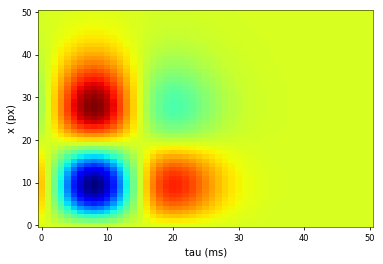

In [19]:
filts = np.load('data/filters.npz')
k1 = filts['wb2']
plt.imshow(k1, cmap='jet')
plt.xlabel("tau (ms)")
plt.ylabel("x (px)")

We're going to simulate the response to some low-frequency Gaussian noise.

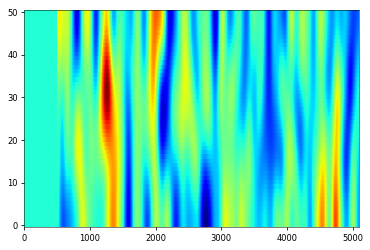

In [29]:
from scipy import ndimage
nx, nt = k1.shape
nsamples = nt * 100
np.random.seed(1)
stim_raw = np.random.randn(nx, nsamples)
stim = ndimage.gaussian_filter(stim_raw, sigma=(10, 50))
stim[:,:500] = 0
plt.imshow(stim, cmap="jet")

Now let's do the convolution:

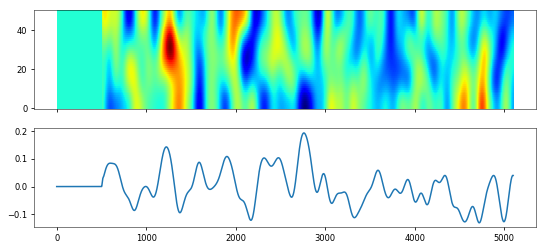

In [31]:
# convolve each pixel (row) separately
convrows = [np.convolve(k1[i], stim[i]) for i in range(nx)]
# sum across rows
conv = np.row_stack(convrows).sum(0)

fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(9, 4))
axes[0].imshow(stim, cmap="jet")
axes[1].plot(conv[:nsamples])

Compare the result of the convolution to the stimulus and the RF. Is it what you would expect?

## Estimating RFs

As Chapter 2 in Dayan and Abbott discusses in more detail, receptive fields can predict many of the tuning properties of visual neurons. This suggests two key conclusions:

1. Visual neurons (up to a point) are pretty linear.
2. Linear models have a lot of explanatory power.

As a consequence, we often want to try to estimate the linear RF of sensory neurons. Even if the neuron isn't totally linear, it's a good place to start. But how do we infer the kernel in a system where we can't stimulate with a delta function?

## Reverse correlation

One very simple approach is to average the stimuli that preceded each spike, like so:

<img src="images/l8_revcor_1d.png" alt="1d reverse correlation" style="width: 400px;"/>

This is called the **spike-triggered average** (STA) or the **reverse correlation**. The latter term is a bit of a historical artefact, because in fact it's simply the cross-correlation of the stimulus and the response.

The STA is easily generalized to multivariate stimuli:

<img src="images/l8_revcor_2d.png" alt="2D reverse correlation" style="width: 300px;"/>

## Stimulus-triggered ensemble

One way of conceptualizing this is by thinking of the set of stimuli presented to the neuron as occupying some high-dimensional space. (*Dimensions* here is the number of pixels, not the number of dimensions in the image)

<img src="images/l8_stensemble.png" alt="spike-triggered ensemble" style="width: 450px;"/>

The STA is simply the centroid of the ensemble of stimuli that triggered a spike:

<img src="images/l8_sta_ensemble.png" alt="spike-triggered average" style="width: 450px;" />

## Stimulus correlations

The spike-triggered average only recovers the kernel of an LTI system if there are no correlations in the stimulus. 

To see why this is, think about how the 1D average would be affected if the stimulus had a lot of low-frequency power, so that the values at any instant in time were correlated with the values around it.

Or think about how the average would be affected if the ensemble of black points in the previous slide were not spherical.

The practical problem this presents is that many neurons don't respond well to uncorrelated Gaussian noise.

## Kernel estimation as linear regression

The solution to the foregoing problem is to correct for the correlations in the stimulus.

It can be helpful to recast the problem as one of linear regression. Remember the expansion of convolution:

$$r(t) = h_0 + h_1 s(t) + h_2 s(t-1) + h_3 s(t-2) + \cdots$$ 

We've added a constant offset $h_0$ and then represented the kernel with subscripts starting with 1.

We can rewrite the sum as a dot product,

$$r(t) = \vec{s}(t) \cdot \vec{h}$$

where $\vec{s}(t)$ refers to the **time-lagged** stimulus. That is $\vec{s}(t) = \{s(t), s(t - 1), \ldots\}$.

Our data consist of a series of observations made for different values of $\vec{s}$. Some of the variance in these observations is explained by variation in the stimulus; the rest is random noise. Letting $r_i$ be the rate at time $t_i$,

$$r_i = \vec{s}_i \cdot \vec{h} + \varepsilon_i$$

We can use matrix notation by stacking all the observations in a vector:

$$\vec{r} = \mathbf{S} \vec{h} + \vec{\varepsilon}$$

In each row, the matrix $\mathbf{S}$ contains the stimulus at the current time and at a set of previous lags. This is a special form called the [Toeplitz matrix](https://en.wikipedia.org/wiki/Toeplitz_matrix).

Given this model, our goal is to estimate $\vec{h}$. That is, to find values that maximize the amount of variance explained by the stimulus and minimize the amount of random error ($\vec{\varepsilon}$).

A standard approach is to try to minimize the sum of the squares of the error. This is called **ordinary least squares** (OLS).

Hopefully, you've seen that our model is a pretty vanilla linear model. The OLS solution is well-known:

$$\hat{h} = (\mathbf{S}^T \mathbf{S})^{-1} \mathbf{S}^T \vec{r} = \left(\sum_i \vec{s}_i \cdot \vec{s}_i \right)^{-1} \left(\sum_i \vec{s}_i r_i \right)$$

- The first term is the autocovariance matrix for the independent variables. 
- The second term is the covariance between the dependent and independent variables. 
- Here, these correspond to the **autocorrelation** and the **cross-correlation**

If the stimulus is white noise, the correlation between any two instants in time is zero, so $\mathbf{S}^T\mathbf{S} = \sigma^2\mathbf{I}$ ($\mathbf{I}$ is the identity matrix and $\sigma^2$ is the variance of the stimulus).

The $^{-1}$ operator stands for **matrix inversion**. This is what "undoes" the effects of the correlations in the stimulus. Matrix inversion is computationally expensive and numerically hairy. There are some tricks for dealing with the latter, but for now let's return to our empirical discussion of V1.

## "Simple" cells

In contrast to the center-surround RFs seen in the visual thalamus, many neurons in the primary visual cortex have more complex, elongated RFs.

<img src="images/l8_simple_rf.png" alt="V1 simple cell RF" style="width: 300px;"/>

This elongation confers **orientation tuning** on these neurons, as illustrated by this simple diagram:

<img src="images/l8_simple_orientation.png" alt="V1 orientation tuning" style="width: 500px;"/>

Like thalamic neurons, simple cells usually have a temporal profile that inverts over time, which makes the neurons prefer *moving* bars.

<img src="images/l8_simple_temporal.png" alt="V1 spectrotemporal" style="width: 450px;"/>

## Complex cells

V1 also contains a number of "complex" cells. Like simple cells, these neurons often have strong orientation tuning, but unlike simple cells, their receptive fields do not have clear "on" and "off" subregions.

Hubel and Wiesel theorized that the tuning properties of simple and complex neurons arose through convergence:

<img src="images/l8_hubel_wiesel.png" alt="Hubel and Wiesel model" style="width: 450px;"/>

## The energy model

One model for complex cells is an extension of the simple LNP model in which the nonlinearity combines inputs from multiple LTI filters:

<img src="images/l8_energy_model.png" alt="LNP energy model" style="width: 400px;"/>

That is,

\begin{align}
L_i(t) & = \sum_j k_i(\tau_j) s(t - \tau_j) \\
r(t) & = r_0 + G(L_1(t), L_2(t), L_3(t), \ldots)
\end{align}

In the energy model, $G$ is simply the sum of the squared outputs of the filters.

## Spike-triggered covariance

In a purely linear time-invariant model, the sum of more than one filter can be described by a single filter, and it's not possible to recover the component filters.

This means that STA and linear regression on complex cells usually just gives you noise.

However, there is still structure in the spike-triggered ensemble:

<img src="images/l8_ste_variance_schwartz.png" alt="spike-triggered ensemble variance" style="width: 500px;"/>

## Finding the important dimensions

What we need to do is to find the dimensions along which the variance of the STE is greater or less than expected. Just as the STA is a vector in the stimulus space that corresponds to a linear filter, the vectors with unexpected variance also correspond to filters.

One method for recovering the dimensions is to use principal components analysis to find the eigenvectors of the STE covariance matrix. Dimensions that have larger or smaller variance than expected are the excitatory and suppressive filters of the cell.

<img src="images/l8_stc_pca.png" alt="STC PCA" style="width: 300px;" />

## Estimating the nonlinearity

The nonlinearity can be found empirically using Bayes' rule:

$$p(\mathrm{spike}|L_i) = \frac{p(L_i|\mathrm{spike})}{p(L_i)}$$

<img src="images/l8_simple_complex_nonlin.png" style="width: 400px;"/>

As predicted by the energy model, the nonlinearities for complex neurons often have a roughly parabolic shape.